Fitting 5 folds for each of 9 candidates, totalling 45 fits


Precisão: 0.925

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.87      0.93      0.90        28
           2       1.00      0.94      0.97        33
           3       1.00      0.91      0.95        34
           4       0.98      0.87      0.92        46
           5       0.96      0.94      0.95        47
           6       0.94      0.97      0.96        35
           7       0.86      0.94      0.90        34
           8       0.85      0.93      0.89        30
           9       0.81      0.88      0.84        40

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



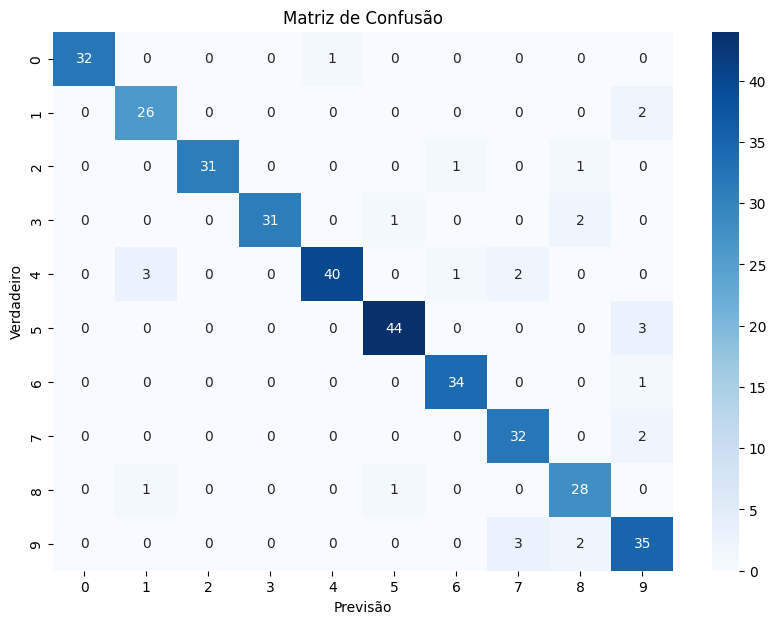

<Figure size 2000x1500 with 0 Axes>

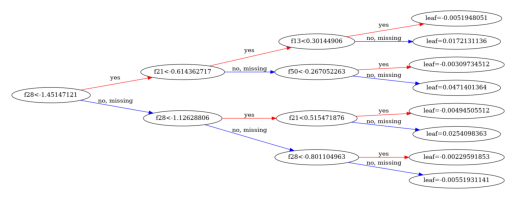

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


# Carregar o dataset MNIST
mnist = load_digits()

x = mnist.data
y = mnist.target

# Normalizar os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Definir o modelo inicial
clf = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Definir os hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [100],
    'max_depth': [3],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Realizar a busca pelos melhores hiperparâmetros usando validação cruzada
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_clf = grid_search.best_estimator_

# Prever as classes para o conjunto de teste
y_pred = best_clf.predict(X_test)

# Calcular e imprimir a precisão do XGBoost
accuracy = accuracy_score(y_test, y_pred)
print("Precisão:", accuracy)

# Imprimir o relatório de classificação
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.show()

# Visualizar uma das árvores do modelo treinado
plt.figure(figsize=(20, 15))
plot_tree(best_clf, num_trees=0, rankdir='LR')
plt.show()

# Salvar o modelo usando pickle
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(best_clf, f)
